# Importacion de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os
import sys
from pathlib import Path

from IPython.display import display, HTML

## Configuración de la ruta del sistema a la carpeta desde donde se importan las funciones

In [2]:
# root_path = os.path.abspath(r'C:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP\PROYECTO_EDA_VGSALES\proyecto_eda_ventas_videojuegos')
# sys.path.append(root_path)
# vgsales_limpio = os.path.join(root_path, 'data', 'processed', 'vgsales_limpio.csv')
# scripts_path = os.path.join(root_path, 'data', 'scripts', 'auto_importer.py')

In [3]:
root_path = Path(os.getcwd()).resolve().parent

In [4]:
sys.path.append(str(root_path))

## Leer archivo csv limpio después del primer análisis y crear la copia para trabajar con los datos

In [5]:
data_set = pd.read_csv('../data/processed/vgsales_limpio.csv', index_col=0)

In [6]:
df = data_set.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16583 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16583 non-null  object 
 1   Platform      16583 non-null  object 
 2   Year          16583 non-null  int64  
 3   Genre         16583 non-null  object 
 4   Publisher     16583 non-null  object 
 5   NA_Sales      16583 non-null  float64
 6   EU_Sales      16583 non-null  float64
 7   JP_Sales      16583 non-null  float64
 8   Other_Sales   16583 non-null  float64
 9   Global_Sales  16583 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


# Análisis exploratório de datos (EDA)

## Estadisticas descriptivas

Tabla que resume detalladamente las variables

In [8]:
from my_scripts.auto_importer import CompleteDescribeTable

In [9]:
tabla_descripcion_detallada = CompleteDescribeTable(df)

In [10]:
tabla_descripcion_detallada.describe_complete()

c:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP\PROYECTO_EDA_VGSALES\proyecto_eda_ventas_videojuegos\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16583.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP\PROYECTO_EDA_VGSALES\proyecto_eda_ventas_videojuegos\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16583.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOTCAMP\PROYECTO_EDA_VGSALES\proyecto_eda_ventas_videojuegos\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16583.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Felipe\Desktop\THE-BRIDGE\THEBRIDGE-BOOT

In [11]:
resumen_df = tabla_descripcion_detallada.get_describe_complete()

In [12]:
resumen_df

,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,Q1,Q3,asimetria,curtosis,Valor estad.,Valor de P,prueba normalidad,tipo asimetria
variable,,,,,,,,,,,,,,,,,,,,
Name,object,categorica,11482,69.239583,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Platform,object,categorica,31,0.186938,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Year,int64,numerica,37,0.223120,No Gaussiana,0.0,1.89,"(1980, 2016)",2008.00,2007.00,2006.400289,5.826176,2003.00,2010.00,-1.026855,1.958422,0.942913,2.315251e-61,No normal,negativa
Genre,object,categorica,12,0.072363,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Publisher,object,categorica,616,3.714648,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
NA_Sales,float64,numerica,409,2.466381,No Gaussiana,0.0,10.11,"(0.0, 41.49)",0.00,0.08,0.264500,0.816824,0.00,0.24,18.806350,649.281125,0.267027,1.799171e-121,No normal,positiva
EU_Sales,float64,numerica,305,1.839233,No Gaussiana,0.0,12.55,"(0.0, 29.02)",0.00,0.02,0.146748,0.505566,0.00,0.11,18.868029,755.412308,0.256084,7.006330e-122,No normal,positiva
JP_Sales,float64,numerica,244,1.471386,No Gaussiana,0.0,14.62,"(0.0, 10.22)",0.00,0.00,0.077848,0.309423,0.00,0.04,11.201627,194.066435,0.244462,2.607768e-122,No normal,negativa
Other_Sales,float64,numerica,157,0.946753,No Gaussiana,0.0,10.04,"(0.0, 10.57)",0.00,0.01,0.048101,0.188669,0.00,0.04,24.224097,1024.496745,0.203436,8.841023e-124,No normal,positiva


## Análisis univariado

Variables categóricas

In [13]:
columnas_categoricas = df.select_dtypes(include='object').columns

Número de ocurrencias de las variables categóricas, definiendo aquellas que tienen más publicaciones.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\4005652908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado_top_10[col], palette='tab10')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\4005652908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado_top_10[col], palette='tab10')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\4005652908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_filtrado_top_10[col], palette='tab10')
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\4005652908.py:6: Futur

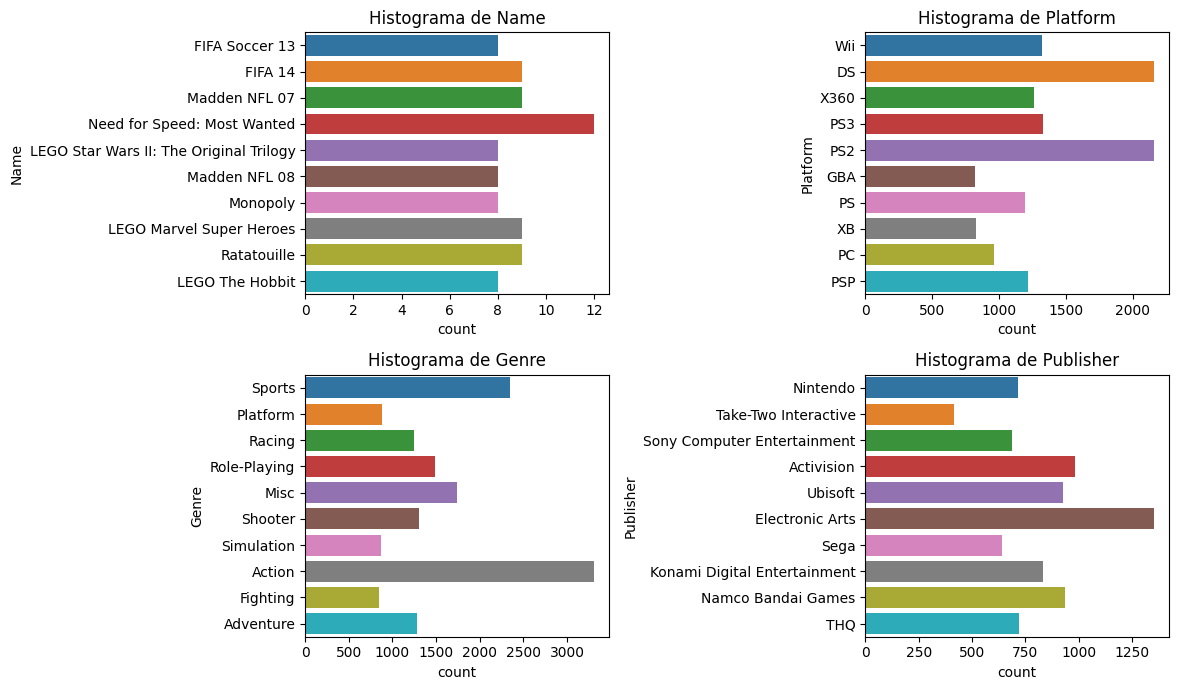

In [14]:
plt.figure(figsize=(12,7))
for i, col in enumerate(columnas_categoricas):
    top_10 = df[col].value_counts().head(10)
    df_filtrado_top_10 = df[df[col].isin(top_10.index)]
    plt.subplot(2,2, i+1)
    sns.countplot(df_filtrado_top_10[col], palette='tab10')
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

||Top 5 de juegos con más lanzamientos|Top 5 de plataformas con más lanzamientos|Top 5 de genero con más lanzamientos|Top 5 de editorial con más lanzamientos|
|--- |--- |--- |--- |--- |
|1|Need for Speed: Most Wanted|Nintendo DS|Acción|EA|  
|2|Fifa 14|Playstation 2|Deportes|Activision|  
|3|LEGO Marvel Super Heroes| Playstation 3|Musical|Namco Bandai Games|  
|4|Maden NFL 07|Nintendo Wii|RPG|Ubisoft|  
|5|Ratatouille|XBOX 360|Shooter|Konami|  

### Análisis de los gráficos

* Columna Name
    * Algunos juegos se repiten muchas veces, lo que indica que fueron lanzados para múltiples plataformas, reflejando estrategias de amplia distribución.

* Columna Platform
    * Dos plataformas destacan significativamente en cantidad de lanzamientos, aunque las demás también presentan cifras relevantes que reflejan su impacto en el mercado.

* Columna Genre
    * Los géneros de acción y deportes lideran como las categorías más populares. Las demás categorías tienen números significativos, sin grandes disparidades entre ellas.

* Columna Publisher
    * Los datos muestran una gran variación, lo que refleja un mercado dinámico. Todos los editores del top 10 cuentan con un número notable de lanzamientos, destacándose especialmente EA.

## Análisis bivariado

### Heat map's

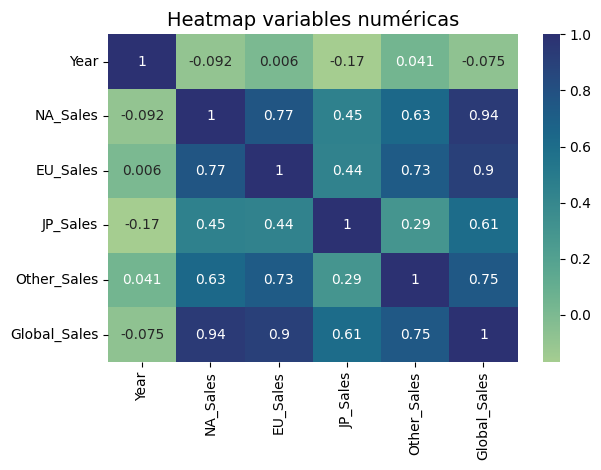

In [15]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='crest');
plt.title("Heatmap variables numéricas", fontsize=14);
plt.tight_layout()
plt.show()

A través del gráfico de correlación se observa que la variable ``Ventas globales`` tiene un papel destacado, mostrando una alta relación con las columnas ``Ventas en América del Norte`` y ``Ventas en Europa``.
Esta fuerte correlación indica que estos dos continentes son los mercados más importantes a nivel mundial para la industria de los videojuegos.

In [16]:
vg_platform_sales = pd.DataFrame(df.groupby('Platform')['Global_Sales'].sum().reset_index()).sort_values(by='Global_Sales', ascending=False).head(10)
vg_publisher_sales = pd.DataFrame(df.groupby('Publisher')['Global_Sales'].sum().reset_index()).sort_values(by='Global_Sales', ascending=False).head(10)

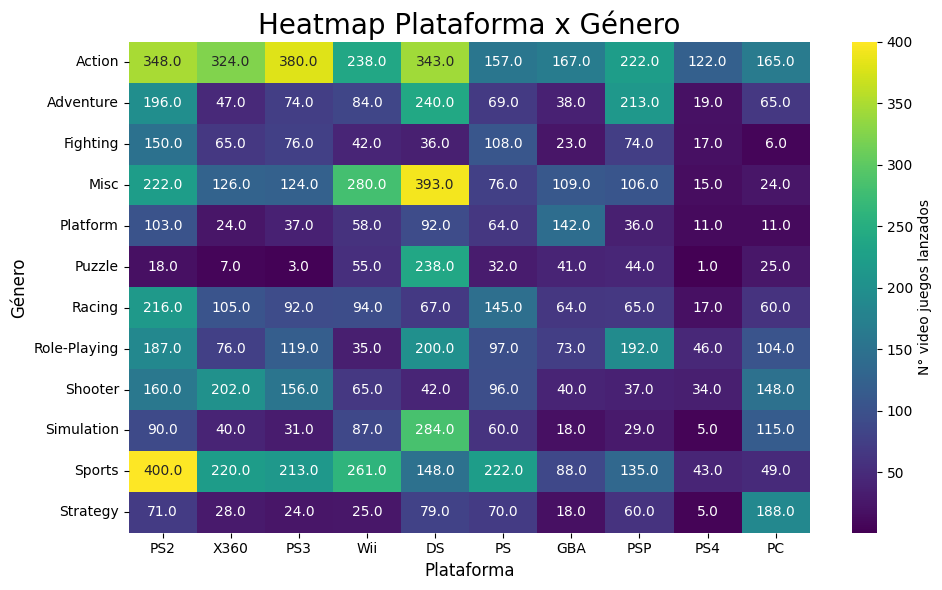

In [17]:
data=df.groupby(['Platform','Genre'])['Name'].count().unstack(['Platform'])
data = data[vg_platform_sales.values[:10,0]]
plt.figure(figsize =(10, 6))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video juegos lanzados'})
plt.title("Heatmap Plataforma x Género", fontsize=20);
plt.xlabel('Plataforma', fontsize = 12)
plt.ylabel('Género', fontsize = 12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Este gráfico nos muestra una forte corelación entre el género Action (el género lider en ventas) con las plataformas del top5 de las plataformas con más ventas en todo el mundo.
Se puede ver también una fuerte relación entre el género misc (varios/mezclado) con la plataforma DS.
También se puede dar énfasis al género Sports con una fuerte relación con la plataforma PS2.

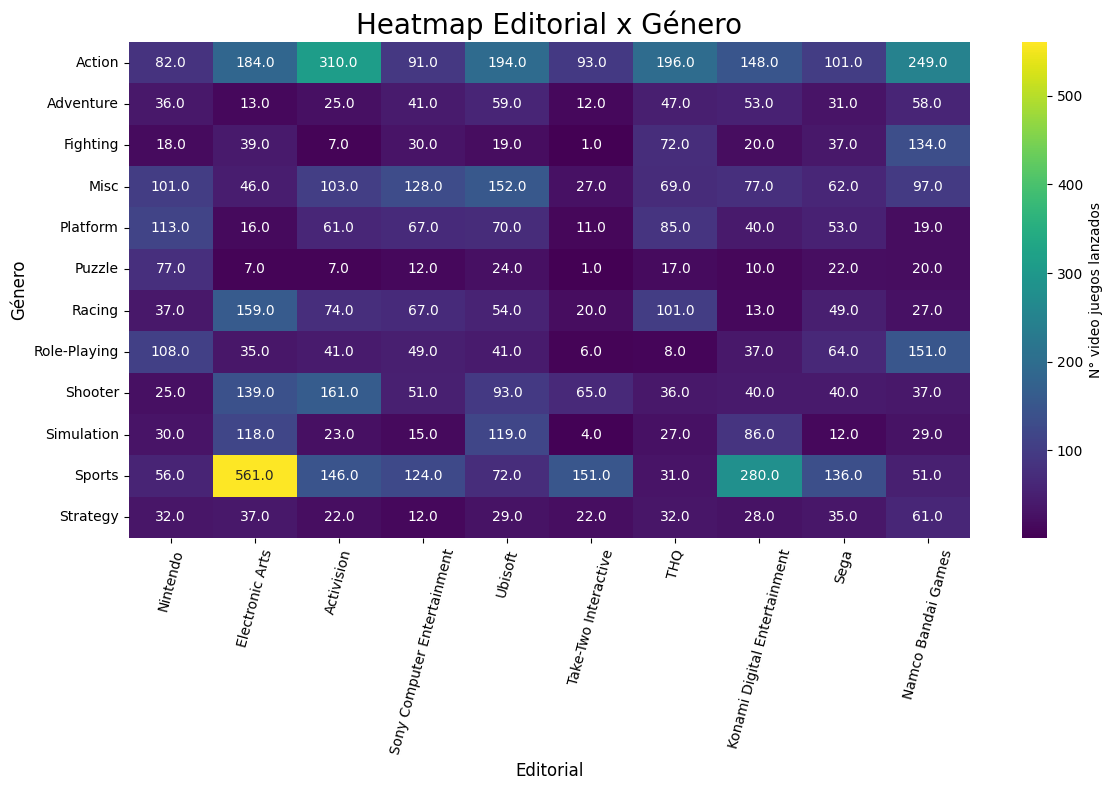

In [18]:
data=df.groupby(['Publisher','Genre'])['Name'].count().unstack(['Publisher'])
data = data[vg_publisher_sales.values[:,0]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video juegos lanzados'})
plt.title("Heatmap Editorial x Género", fontsize=20);
plt.xlabel('Editorial', fontsize = 12)
plt.ylabel('Género', fontsize = 12)
plt.yticks(rotation=0)
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

Aquí se puede ver una relación muy fuerte entre en género Sports y la editorial EA, existe también una considerable relacíon con la empresa Konami.  
También se puede ver una relación fuerte entre el género Action y las editoriales Activision y Namco Bandai.

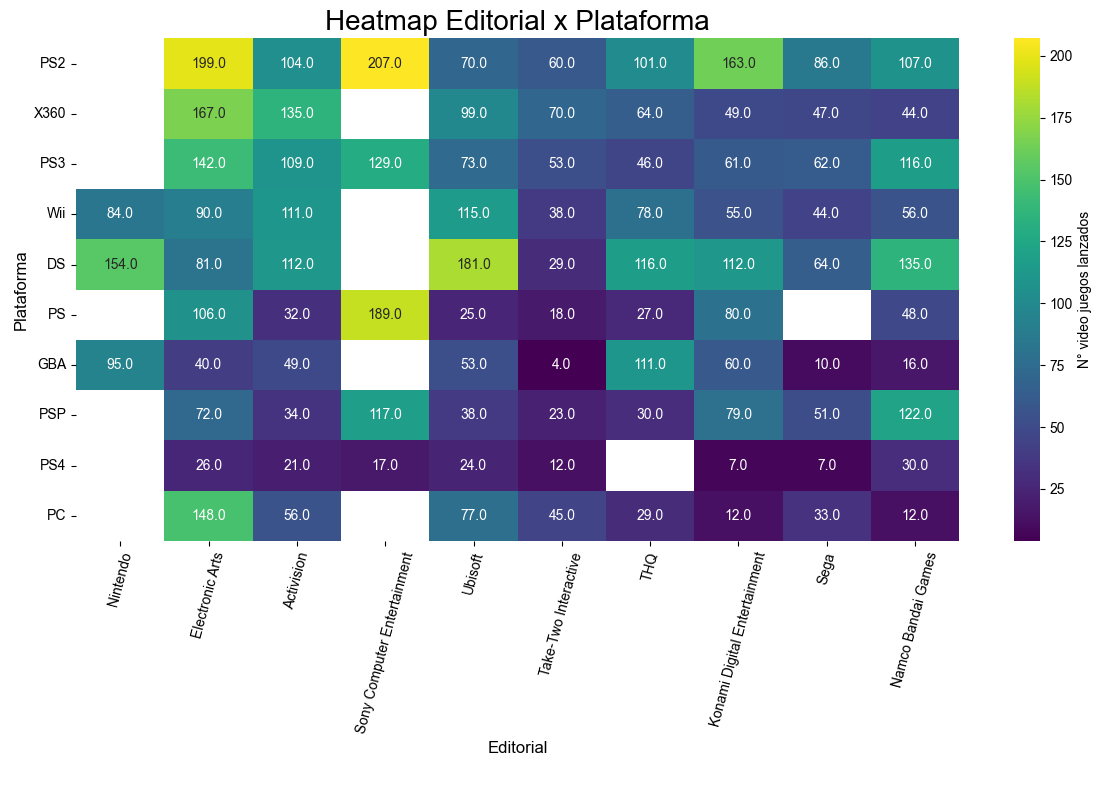

In [19]:
data=df.groupby(['Publisher','Platform'])['Name'].count().unstack(['Publisher'])
data = data[vg_publisher_sales.values[:,0]]
data = data.loc[vg_platform_sales.values[:10,0]]
plt.figure(figsize =(12, 8))
sns.heatmap(data,
          annot=True ,fmt='.1f',
          cmap='viridis',
          cbar_kws={'label': 'N° video juegos lanzados'})
sns.set_style("whitegrid", {"grid.color":"white"})
plt.title("Heatmap Editorial x Plataforma", fontsize=20);
plt.xlabel('Editorial', fontsize = 12)
plt.ylabel('Plataforma', fontsize = 12)
plt.yticks(rotation=0)
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Aquí se puede ver correlación relevante entre:

| Consola | Editorial |||
|---|---|---|---|
| PS2 | EA     | Sony | Konami | 
| PS3 | EA     |  |  |
| X360 | EA     |  |  |
| DS | Nintendo | Ubisoft |
| PS | Sony |  |  |
| PC |  EA |  |  | 

### Visualizaciones

#### Top 10 juegos más vendidos por continente y en el mundo

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2346158792.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='tab10');


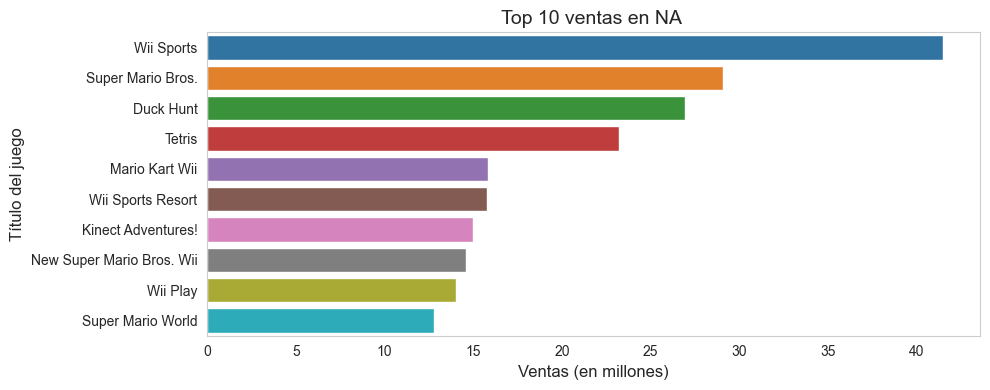

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2346158792.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='tab10');


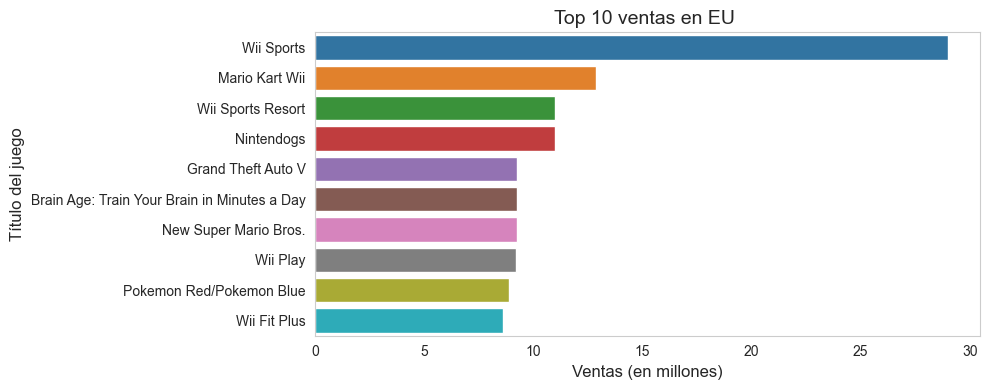

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2346158792.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='tab10');


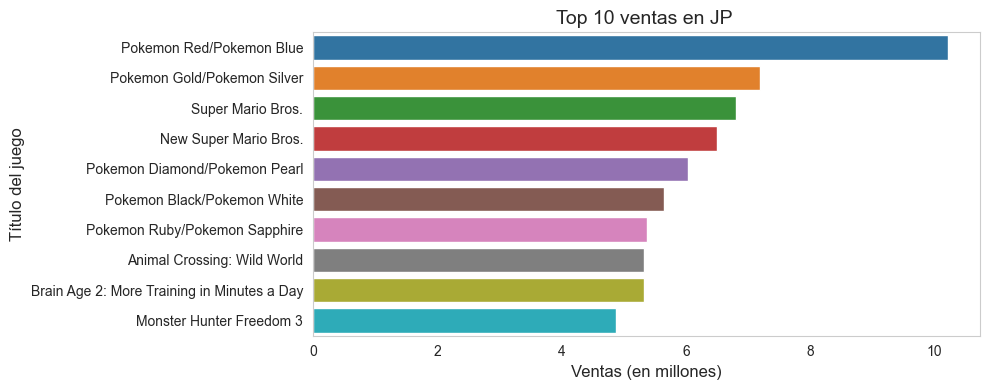

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2346158792.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='tab10');


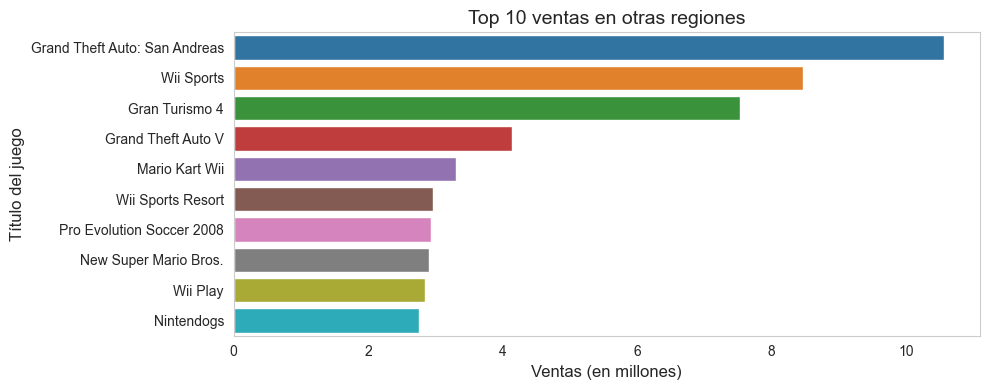

In [20]:
filtered_df = df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for column in sales_columns:
    
    top_10_by_region = filtered_df[['Name', column]].sort_values(by=column, ascending=False).head(10)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_10_by_region[column], y=top_10_by_region['Name'], palette='tab10');

    plt.xlabel("Ventas (en millones)", fontsize=12)
    plt.ylabel("Título del juego", fontsize=12)
    plt.title(f"Top 10 ventas en {'otras regiones' if column == 'Other_Sales' else column.replace('_Sales', ' ')}", fontsize=14)
    
    plt.tight_layout()
    plt.show()

Visualización de ventas globales de juegos separadas por región

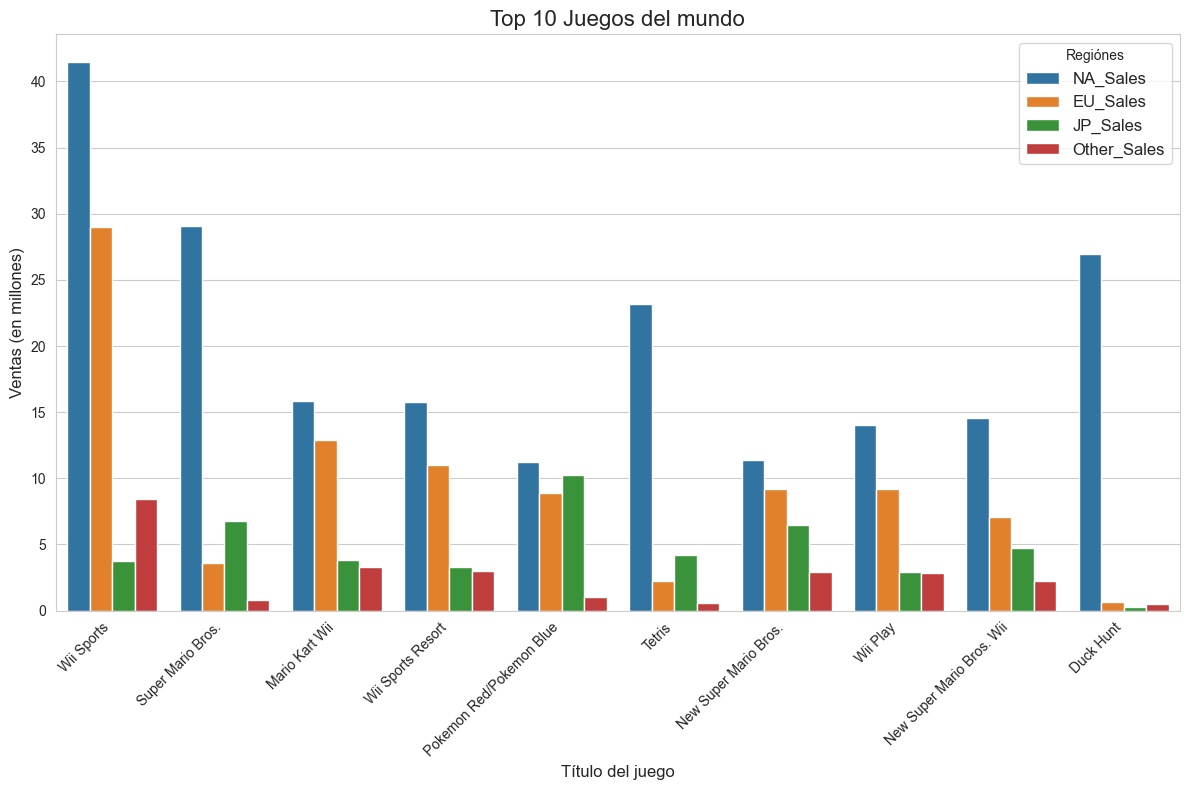

In [21]:
filtered_df = df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
top_10_games = filtered_df.sort_values(by='Global_Sales', ascending=False).head(10)

top_10_games_long = top_10_games.melt(id_vars='Name', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], 
                                      var_name='Region', value_name='Sales')

plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
sns.barplot(x='Name', y='Sales', hue='Region', data=top_10_games_long, dodge=True)

plt.title("Top 10 Juegos del mundo", fontsize=16)
plt.ylabel("Ventas (en millones)", fontsize=12)
plt.xlabel("Título del juego", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Regiónes", fontsize=12)

# Improve layout and display plot
plt.tight_layout()
plt.show()


#### Top 10 Plataformas más vendidos por continente y en el mundo

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3958055866.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3958055866.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3958055866.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the 

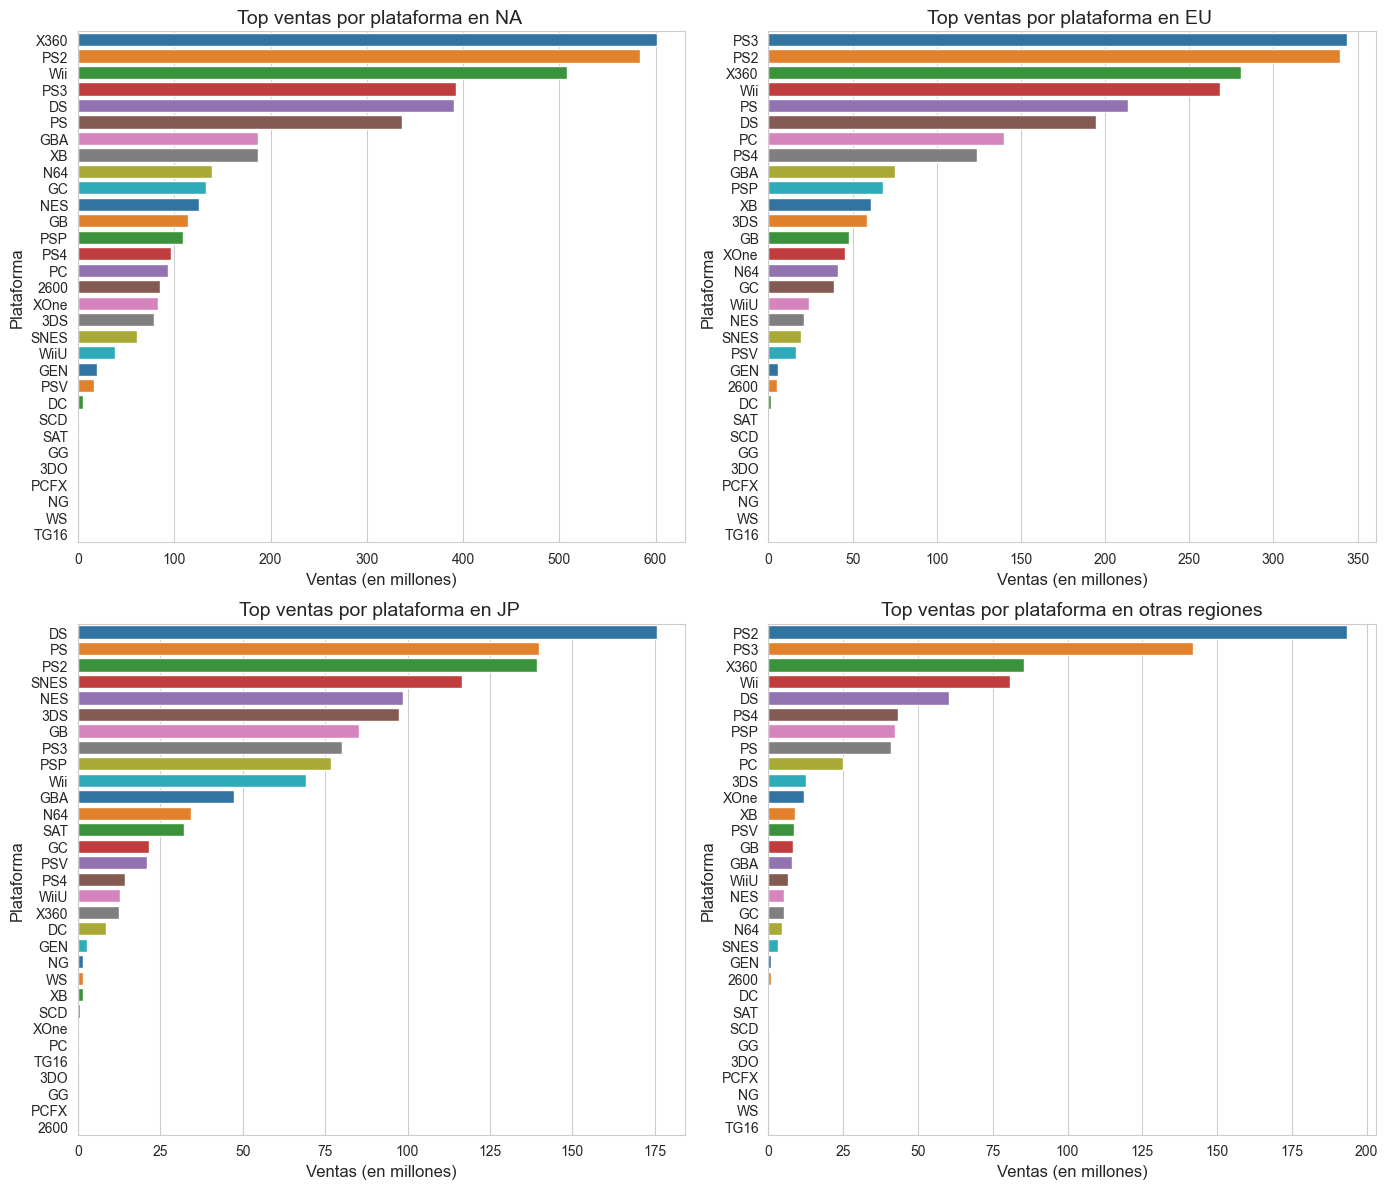

In [22]:
filtered_df_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_region = filtered_df_platform.groupby('Platform')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Platform'], palette='tab10', errorbar=None)
    
    ax.set_title(f"Top ventas por plataforma en {'otras regiones' if column == 'Other_Sales' else column.replace('_Sales', ' ')}", fontsize=14)
    ax.set_xlabel("Ventas (en millones)", fontsize=12)
    ax.set_ylabel("Plataforma", fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
top_10_global_sales_platform = df.groupby(['Platform'])[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).head(10).reset_index()

In [24]:
top_10_global_sales_platform

,Platform,Global_Sales
0,PS2,1255.64
1,X360,979.95
2,PS3,957.84
3,Wii,926.69
4,DS,822.20
5,PS,730.66
6,GBA,317.57
7,PSP,296.28
8,PS4,278.07
9,PC,258.82


In [25]:
filter_top10_platforms_by_year = df.groupby(['Year','Platform'])['Global_Sales'].sum().reset_index()

In [26]:
filter_top10_platforms_by_year = filter_top10_platforms_by_year.loc[filter_top10_platforms_by_year.groupby('Year')['Global_Sales'].idxmax()]

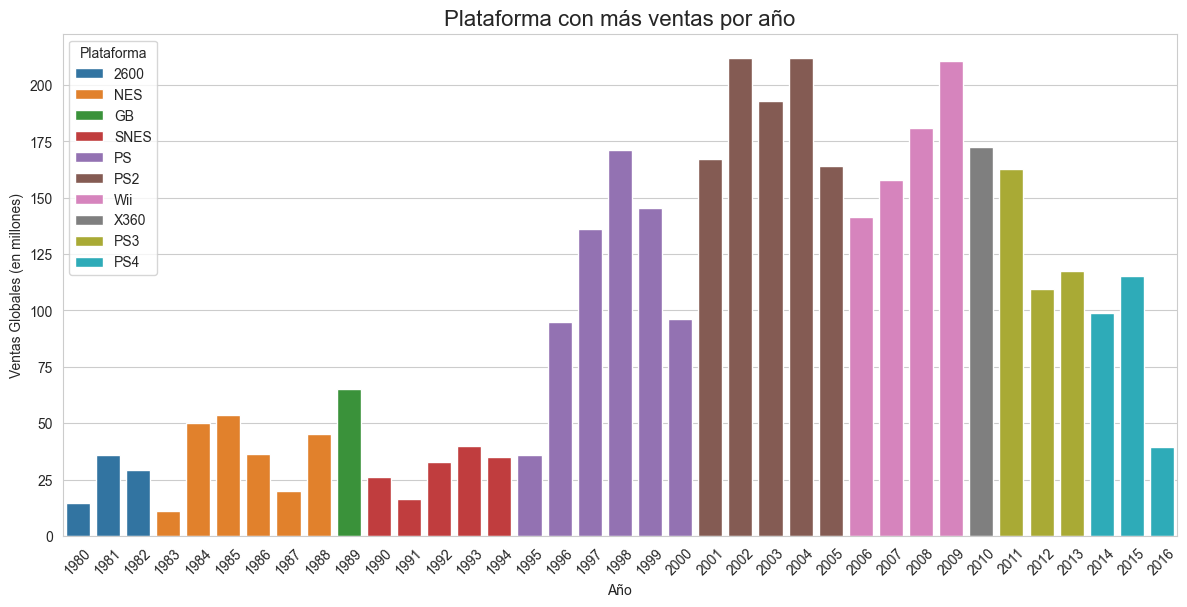

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Global_Sales', hue='Platform', data=filter_top10_platforms_by_year, dodge=False)

plt.title('Plataforma con más ventas por año', fontsize=16)
plt.xlabel('Año')
plt.ylabel('Ventas Globales (en millones)')

plt.legend(title='Plataforma')
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Visualización de las plataformas mas vendidas mundialmente sumadas las ventas en todas las regiones

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2498922392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top_10_global_platform_chart = sns.barplot(data=top_10_global_sales_platform, x='Platform', y='Global_Sales',palette='tab10')


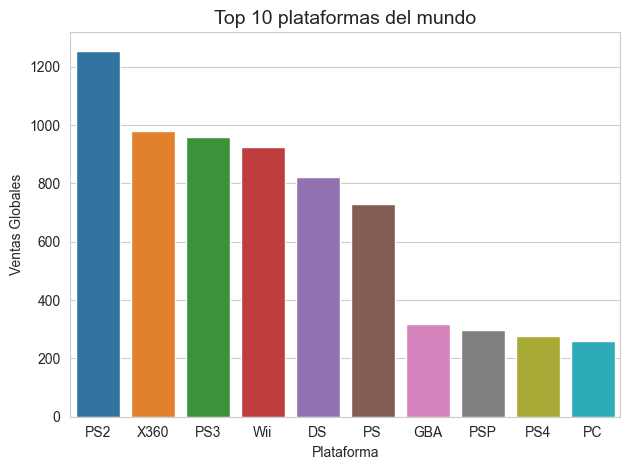

In [28]:
sns.set_style('whitegrid')
top_10_global_platform_chart = sns.barplot(data=top_10_global_sales_platform, x='Platform', y='Global_Sales',palette='tab10')
top_10_global_platform_chart.set_xlabel("Plataforma")
top_10_global_platform_chart.set_ylabel("Ventas Globales")
plt.title("Top 10 plataformas del mundo", fontsize=14)
plt.tight_layout()

#### Top 10 géneros más vendidos por continente y en el mundo

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3082962553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3082962553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3082962553.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

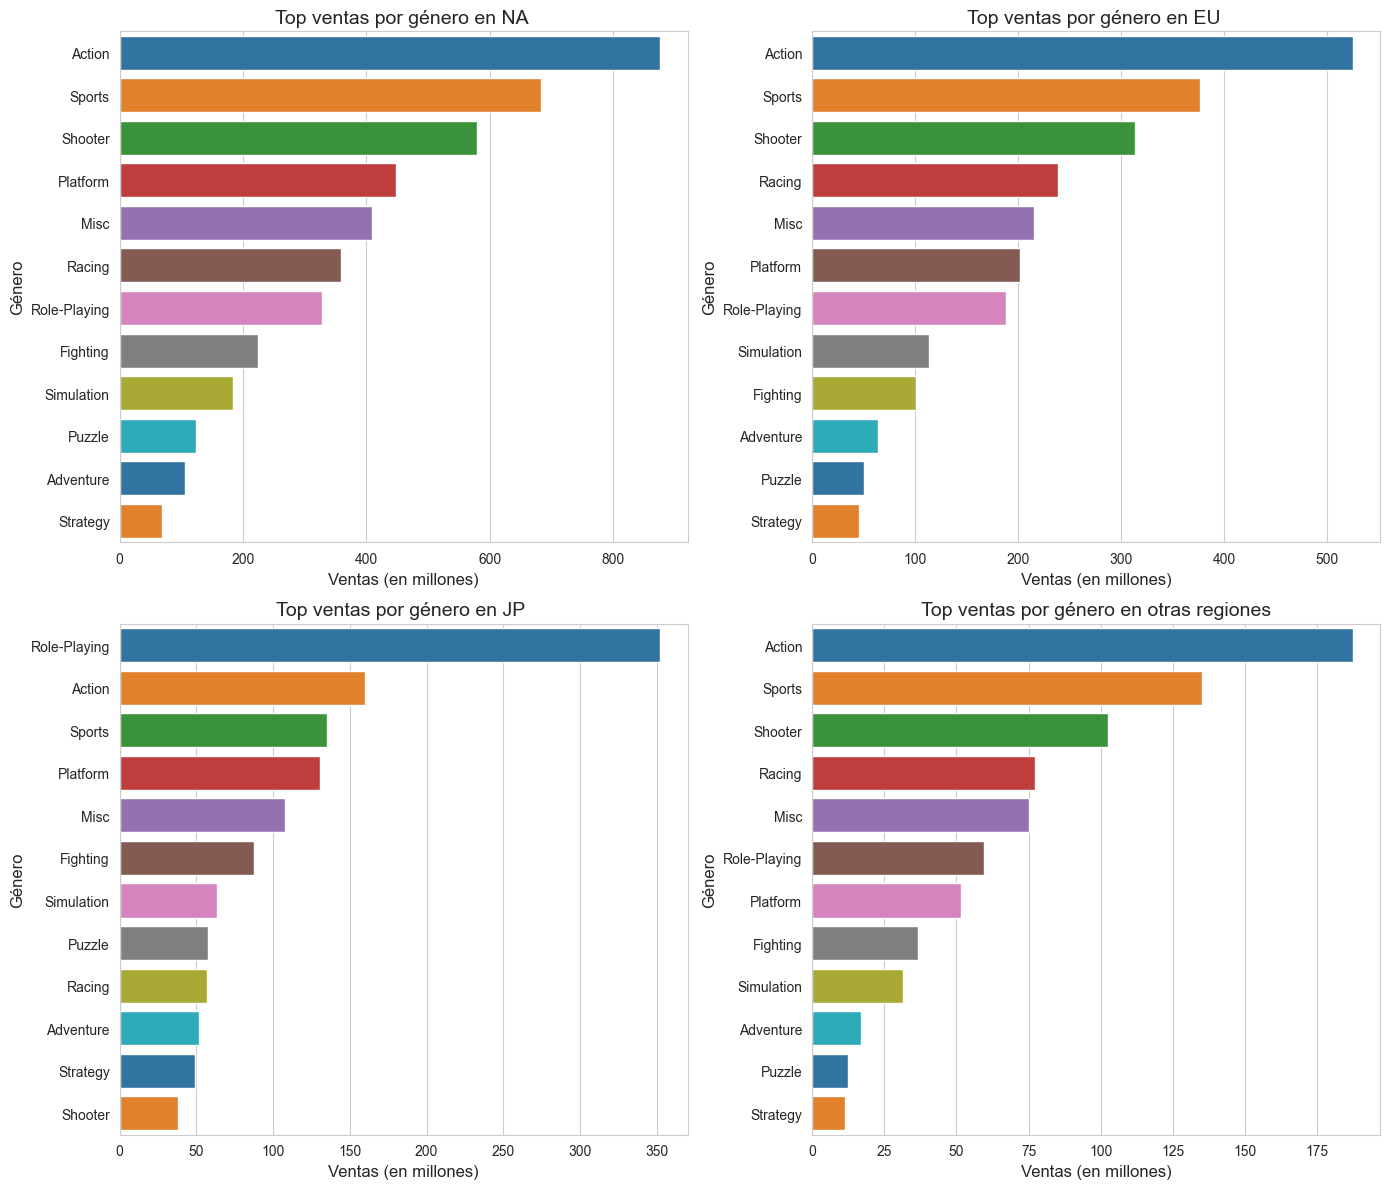

In [29]:
filtered_df_platform = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_region = filtered_df_platform.groupby('Genre')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_region[column], y=platform_sales_by_region['Genre'], palette='tab10', errorbar=None)
    
    ax.set_title(f"Top ventas por género en {'otras regiones' if column == 'Other_Sales' else column.replace('_Sales',' ')}", fontsize=14)
    ax.set_xlabel("Ventas (en millones)", fontsize=12)
    ax.set_ylabel("Género", fontsize=12)

plt.tight_layout()
plt.show()


In [30]:
top_10_global_sales_genre = df.groupby('Genre')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).reset_index()

In [31]:
top_10_global_sales_genre

,Genre,Global_Sales
0,Action,1749.34
1,Sports,1330.78
2,Shooter,1033.83
3,Role-Playing,927.33
4,Platform,831.37
5,Misc,809.03
6,Racing,731.77
7,Fighting,448.91
8,Simulation,391.91
9,Puzzle,244.51


Visualización de los generos más vendidos mundialmente sumadas las ventas en todas las regiones

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\3883637661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  top_10_global_genre_chart = sns.barplot(data=top_10_global_sales_genre, x='Genre', y='Global_Sales',palette='tab10');


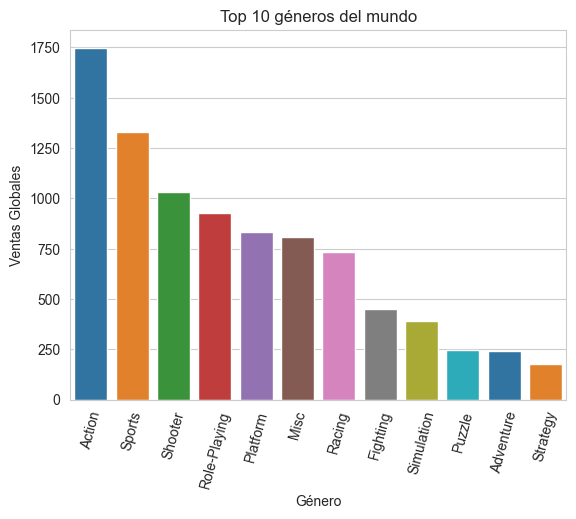

In [32]:
top_10_global_genre_chart = sns.barplot(data=top_10_global_sales_genre, x='Genre', y='Global_Sales',palette='tab10');
top_10_global_genre_chart.set_xlabel("Género")
top_10_global_genre_chart.set_ylabel("Ventas Globales")
top_10_global_genre_chart.set_title("Top 10 géneros del mundo")
plt.xticks(rotation=75);

Creación de la columna decadas, organización por la suma de las ventas globales e asignacion de la variable para plotar el grafico

In [33]:
df['Decade'] = (df['Year'] // 10) * 10
# df.loc[df['Year'] >= 2011, 'Decade'] = 2020

In [34]:
top_sales_by_genre_per_decade = (df.groupby(['Decade','Genre'])[['Global_Sales']].sum())

In [35]:
# top_sales_by_genre_per_decade = top_sales_by_genre_per_decade.sort_values(by=['Global_Sales'],ascending=False)

In [36]:
top_sales_by_genre_per_decade.sort_values(by=['Decade','Global_Sales'],ascending=False)

Global_Sales
Decade Genre                     
2010   Action              682.73
       Shooter             466.03
       Sports              327.13
       Role-Playing        306.51
       Misc                238.83
       Racing              125.71
       Platform            120.75
       Fighting             82.08
       Simulation           72.02
       Adventure            61.16
       Strategy             36.64
       Puzzle               21.94
2000   Action              874.00
       Sports              822.63
       Misc                498.21
       Racing              443.24
       Shooter             439.06
       Role-Playing        420.72
       Platform            378.41
       Simulation          267.33
       Fighting            235.67
       Adventure           126.95
       Puzzle              120.26
       Strategy             81.05
1990   Platform            209.94
       Role-Playing        184.85
       Racing              150.40
       Sports              148.23
       Action              140.54
       Fighting            123.45
       Shooter              68.95
       Misc                 63.54
       Strategy             57.43
       Simulation           52.05
       Adventure            44.85
       Puzzle               38.99
1980   Platform            122.27
       Puzzle               63.32
       Shooter              59.79
       Action               52.07
       Sports               32.79
       Role-Playing         15.25
       Racing               12.42
       Misc                  8.45
       Fighting              7.71
       Adventure             6.08
       Simulation            0.51

Gráfico de ventas por genero por cada decada

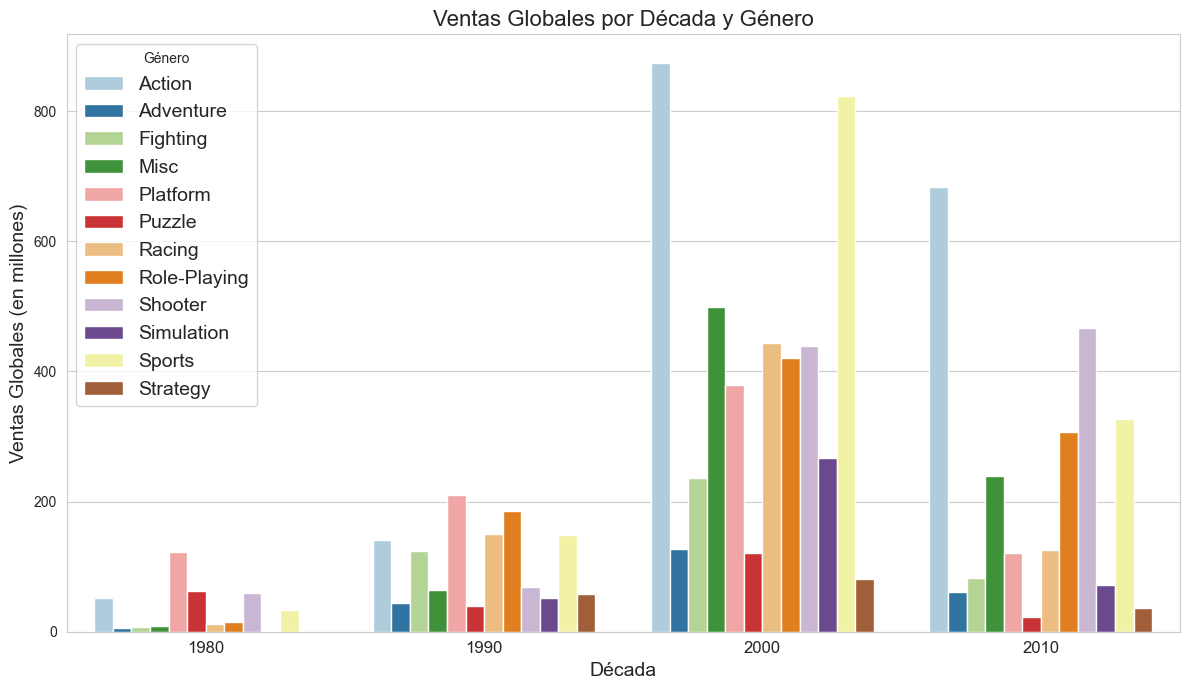

In [37]:
custom_palette = sns.color_palette("Paired", 12)

# Plot the data by decades
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=top_sales_by_genre_per_decade, x='Decade', y='Global_Sales', hue='Genre', errorbar=None, palette=custom_palette)


# Customize the chart
plt.title("Ventas Globales por Década y Género", fontsize=16)
plt.xlabel("Década", fontsize=14)
plt.ylabel("Ventas Globales (en millones)", fontsize=14)
plt.xticks(fontsize=12)
plt.legend(title="Género", fontsize=14)
plt.tight_layout()

plt.show()


Suma de ventas globales de generos por año y asignación de variable para plotar los heatmaps que muestram la distribución de generos mas vendidos por cada año.

In [38]:
top10_genres_by_year = df.groupby(['Year','Decade'])[['Global_Sales']].sum().reset_index()

In [39]:
top10_genres_by_year = pd.DataFrame(top10_genres_by_year)

In [40]:
top10_genres_by_year = (df.groupby(['Year','Genre','Decade'])[['Global_Sales']].sum())

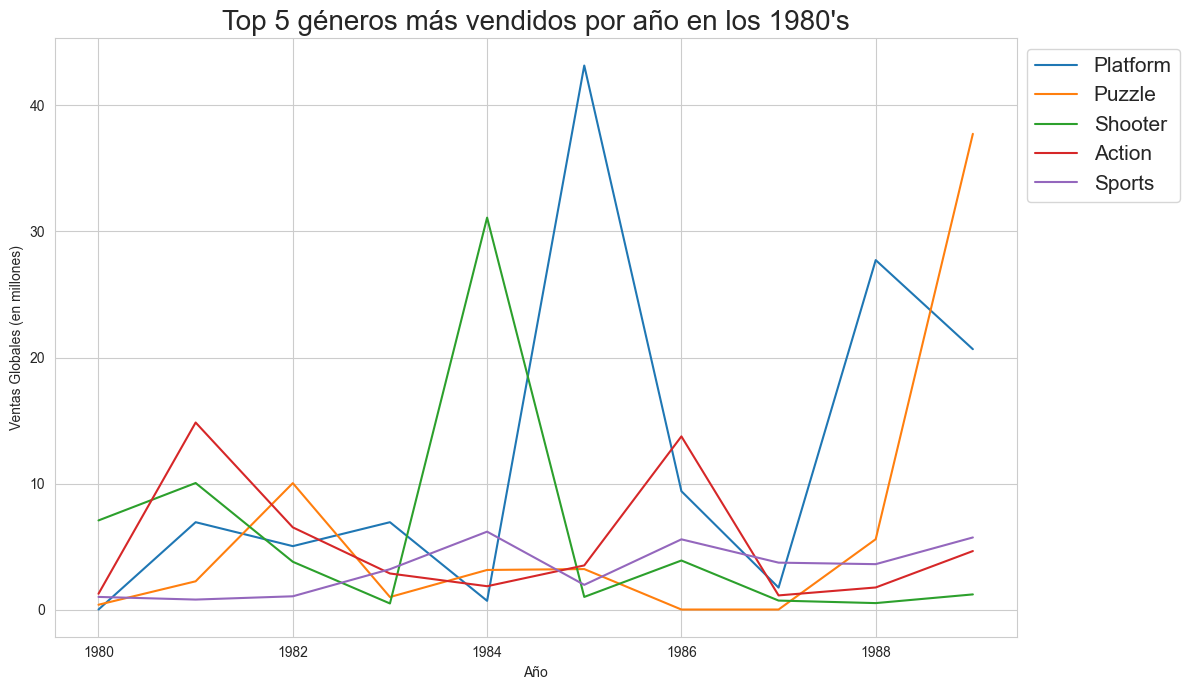

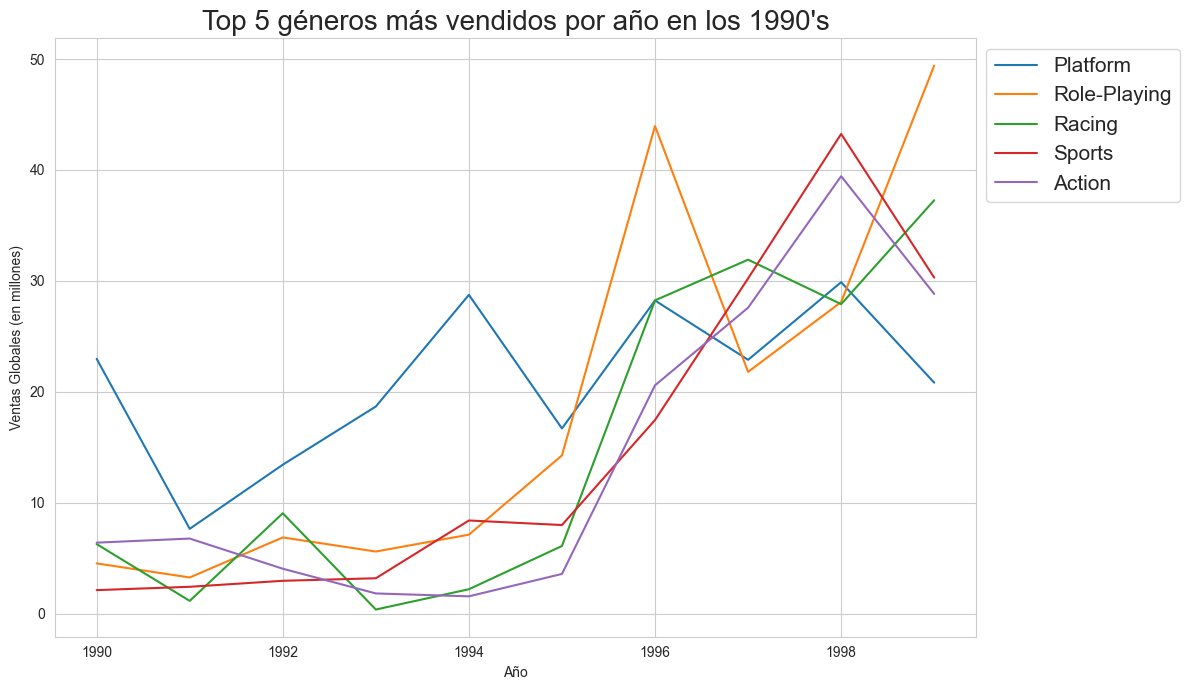

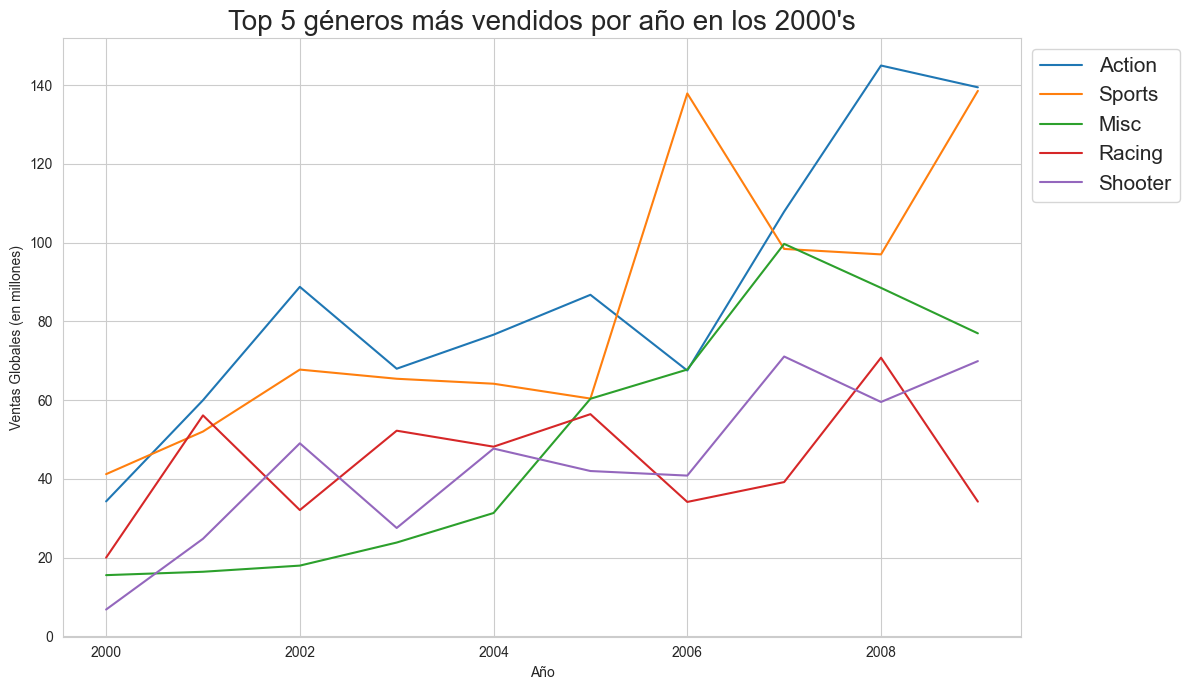

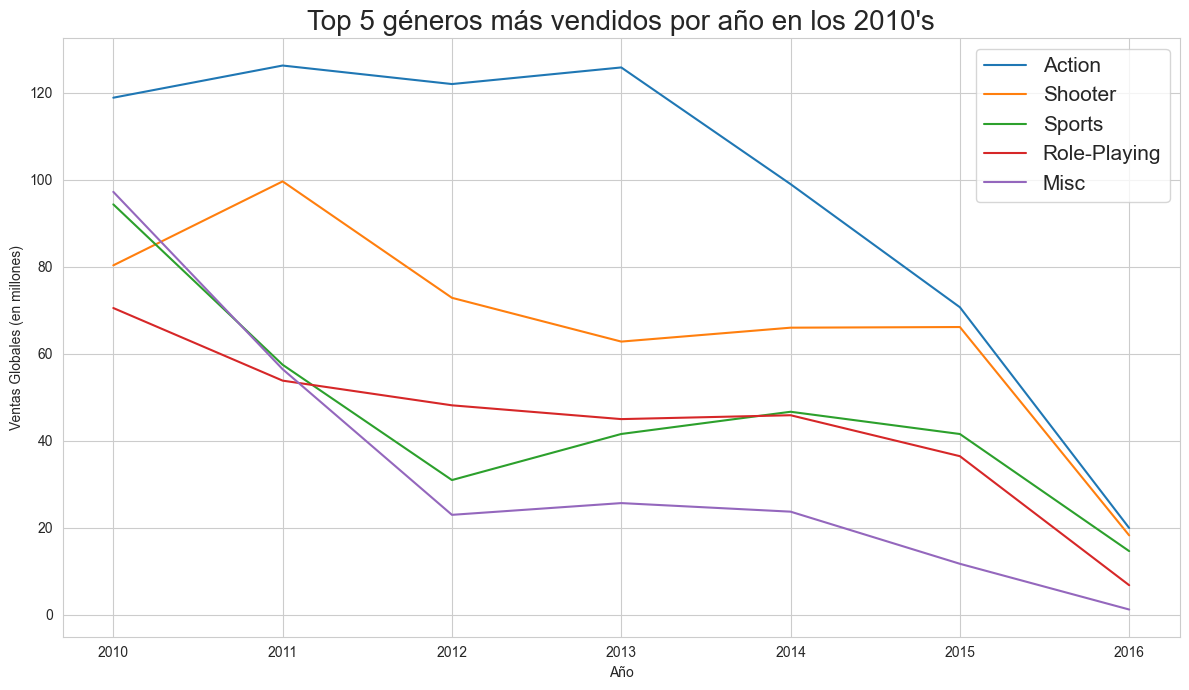

In [41]:
for decade, group in top10_genres_by_year.groupby('Decade'):
    # Aggregate by year and genre
    yearly_genre_sales = group.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)

    # Filter for top 10 genres
    top_genres = group.groupby('Genre')['Global_Sales'].sum().nlargest(5).index
    yearly_genre_sales = yearly_genre_sales[top_genres]

    plt.figure(figsize=(12, 7))
    sns.lineplot(yearly_genre_sales, dashes=False)

    plt.legend(fontsize=15, bbox_to_anchor=(1,1))
    plt.title(f"Top 5 géneros más vendidos por año en los {decade}'s", fontsize=20)
    plt.xlabel("Año")
    plt.ylabel("Ventas Globales (en millones)")
    plt.tight_layout()
    plt.show()


Bar chart race para visualización de los generos mas vendidos a lo largo de los años.

In [42]:
abcde = """<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/21033413">
<script src="https://public.flourish.studio/resources/embed.js"></script>
<noscript><img src="https://public.flourish.studio/visualisation/21033413/thumbnail" width="100%" alt="bar-chart-race visualization" /></noscript>
</div>"""

HTML(abcde)

# En caso de que no funcione, ejecutar la seguiente celda

In [43]:
iframe_code = '''
<iframe src="https://public.flourish.studio/visualisation/21033413/" 
        width="100%" 
        height="900px" 
        frameborder="0" 
        scrolling="no">
</iframe>
'''

# Display the iframe in the notebook
display(HTML(iframe_code))

#### Top 10 número de ventas por editorial por continente

C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2476735823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2476735823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='tab10', errorbar=None)
C:\Users\Felipe\AppData\Local\Temp\ipykernel_13552\2476735823.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=F

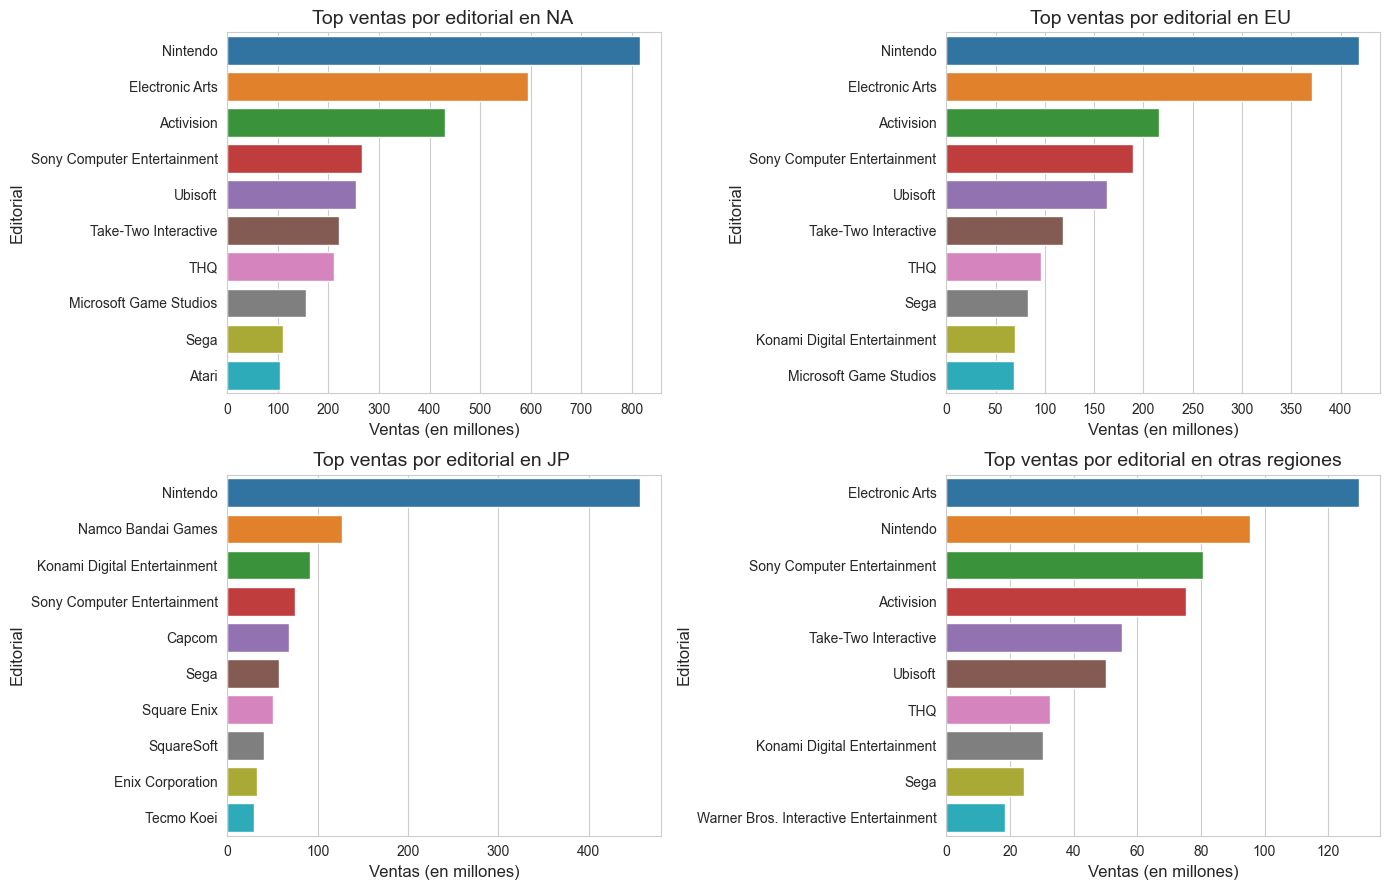

In [44]:
filtered_df_publisher = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
platform_sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

fig, axes = plt.subplots(2, 2, figsize=(14, 9))

for i, column in enumerate(platform_sales_columns):
    
    platform_sales_by_publisher = filtered_df_publisher.groupby('Publisher')[platform_sales_columns].sum().reset_index().sort_values(by=column, ascending=False).head(10)
    ax = axes[i // 2, i % 2]
    sns.set_style('whitegrid')
    sns.barplot(ax=ax, x=platform_sales_by_publisher[column], y=platform_sales_by_publisher['Publisher'], palette='tab10', errorbar=None)
    
    axis_title = (lambda col: 'Top ventas por editorial en otras regiones' if col == 'Other_Sales' else f'Top ventas por editorial en {col.replace("_Sales"," ")}')(column)
    ax.set_title(axis_title, fontsize=14)
    # ax.set_title(f"Top Publisher Sales in {column.replace('_Sales',' ')}", fontsize=14)
    ax.set_xlabel("Ventas (en millones)", fontsize=12)
    ax.set_ylabel("Editorial", fontsize=12)

plt.tight_layout()
plt.show()


df para muestrar los géneros más publicados por editorial

In [45]:
games_per_genre_per_publisher = df.groupby(['Publisher','Genre']).nunique().reset_index().sort_values(by='Name', ascending=False).iloc[:25]

In [46]:
games_per_genre_per_publisher

,Publisher,Genre,Name,Platform,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade
529,Electronic Arts,Sports,212,17,22,147,98,15,61,200,3
1158,Namco Bandai Games,Action,204,18,24,28,20,39,12,52,3
946,Konami Digital Entertainment,Sports,192,19,23,24,44,58,28,76,3
1165,Namco Bandai Games,Role-Playing,123,17,24,36,29,47,16,63,4
1470,Sony Computer Entertainment,Misc,121,5,18,45,54,22,39,79,3
85,Activision,Action,112,18,28,84,58,8,29,112,4
1207,Nintendo,Role-Playing,104,9,22,59,53,74,30,87,3
1204,Nintendo,Platform,102,10,31,80,63,80,39,105,4
304,Capcom,Action,102,21,23,55,46,46,22,79,4
1160,Namco Bandai Games,Fighting,101,19,25,44,35,45,21,71,4


Filtrado con las 10 editoriales con más ventas en todo el mundo

In [47]:
top_10_global_sales_publisher = df.groupby('Publisher')[['Global_Sales']].sum().sort_values(by='Global_Sales',ascending=False).reset_index()

In [48]:
top_10_global_sales_publisher = top_10_global_sales_publisher.head(10)
top_10_global_sales_publisher

,Publisher,Global_Sales
0,Nintendo,1789.48
1,Electronic Arts,1110.66
2,Activision,728.18
3,Sony Computer Entertainment,609.87
4,Ubisoft,475.09
5,Take-Two Interactive,399.54
6,THQ,344.37
7,Konami Digital Entertainment,283.64
8,Sega,273.68
9,Namco Bandai Games,254.12


Exportación del archivo para creación del treemap utilizando plataforma externa Flourish

In [49]:
# top_10_global_sales_publisher.to_csv('top10publisherglobal.csv')

In [50]:
# iframe_code_treemap_top_10_global_publisher = '''
# <iframe src="https://public.flourish.studio/visualisation/21039459/" 
#         width="100%" 
#         height="900px" 
#         frameborder="0" 
#         scrolling="no">
# </iframe>
# '''

iframe_code_treemap_top_10_global_publisher = '''
<div class="flourish-embed flourish-hierarchy" data-src="visualisation/21039459" style="width: 1100px; height: 900px;">
<script src="https://public.flourish.studio/resources/embed.js"></script>
<noscript><img src="https://public.flourish.studio/visualisation/21039459/thumbnail" width="100%" alt="hierarchy visualization" /></noscript>
</div>
'''

# Display the iframe in the notebook
display(HTML(iframe_code_treemap_top_10_global_publisher))

#### Comparativo de ventas globales a lo largo de los años por región

In [51]:
global_sales_year = df.groupby('Year')['Global_Sales'].sum()

In [52]:
best_year_sales = global_sales_year.idxmax()

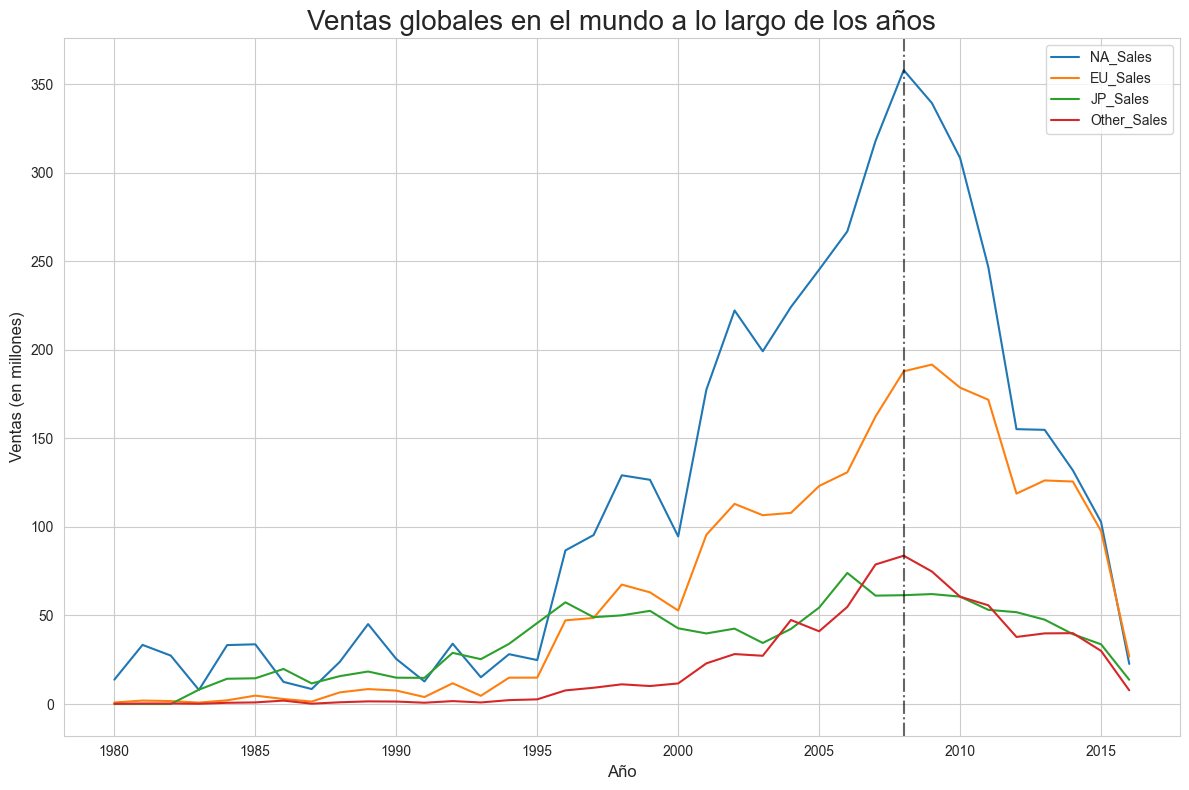

In [53]:
GSales_Year = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
GSales_Year.plot(figsize = (12,8))
plt.title("Ventas globales en el mundo a lo largo de los años", fontsize=20)
plt.axvline(x=best_year_sales,c = 'black',linestyle = '-.',alpha = 0.6)
plt.ylabel('Ventas (en millones)',fontsize = 12)
plt.xlabel('Año', fontsize=12)

plt.tight_layout()
plt.show()

#### Visualización de ventas por genero, plataforma y editorial comparando cada región

In [54]:
# Iterando el dataframe para descubrir el numero de juegos, plataformas y editoriales que lanzaran algo a lo largo de los años, con el objetivo de encuentrar alguna relación entre estes datos y el pico de ventas en 2008.

counter_results = []

for column in ["Name", "Platform","Publisher"]:
    counts = df.groupby("Year")[column].nunique()
    counter_results.append(pd.DataFrame({
        "Año": counts.index,
        "Columna": column,
        "Cuantidad": counts.values
    }))
    
df_counter_results = pd.concat(counter_results, ignore_index=True)

In [55]:
df_counter_results

,Año,Columna,Cuantidad
0,1980,Name,15
1,1981,Name,46
2,1982,Name,37
3,1983,Name,18
4,1984,Name,14
...,...,...,...
106,2012,Publisher,105
107,2013,Publisher,76
108,2014,Publisher,70
109,2015,Publisher,95


Tabla que demuestra el ciclo de vida de cada consola

In [56]:
range_years_platf_lifecycle = df.groupby('Platform')['Year'].agg(['min','max']).sort_values(by='min',ascending=True)

In [57]:
range_years_platf_lifecycle['lifecycle'] = range_years_platf_lifecycle['max'] - range_years_platf_lifecycle['min']

In [58]:
range_years_platf_lifecycle

,min,max,lifecycle
Platform,,,
2600,1980,1992,12
NES,1983,1994,11
PC,1985,2016,31
GB,1988,2001,13
GEN,1990,1994,4
SNES,1990,1999,9
GG,1992,1992,0
NG,1993,1996,3
SCD,1993,1994,1


In [59]:
vg_sales_genre = pd.DataFrame(df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()).reset_index().sort_values(by = 'Global_Sales',ascending=False)
vg_sales_publisher = pd.DataFrame(df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()).reset_index().sort_values(by = 'Global_Sales',ascending=False)
vg_sales_platform = pd.DataFrame(df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()).reset_index().sort_values(by = 'Global_Sales',ascending=False)

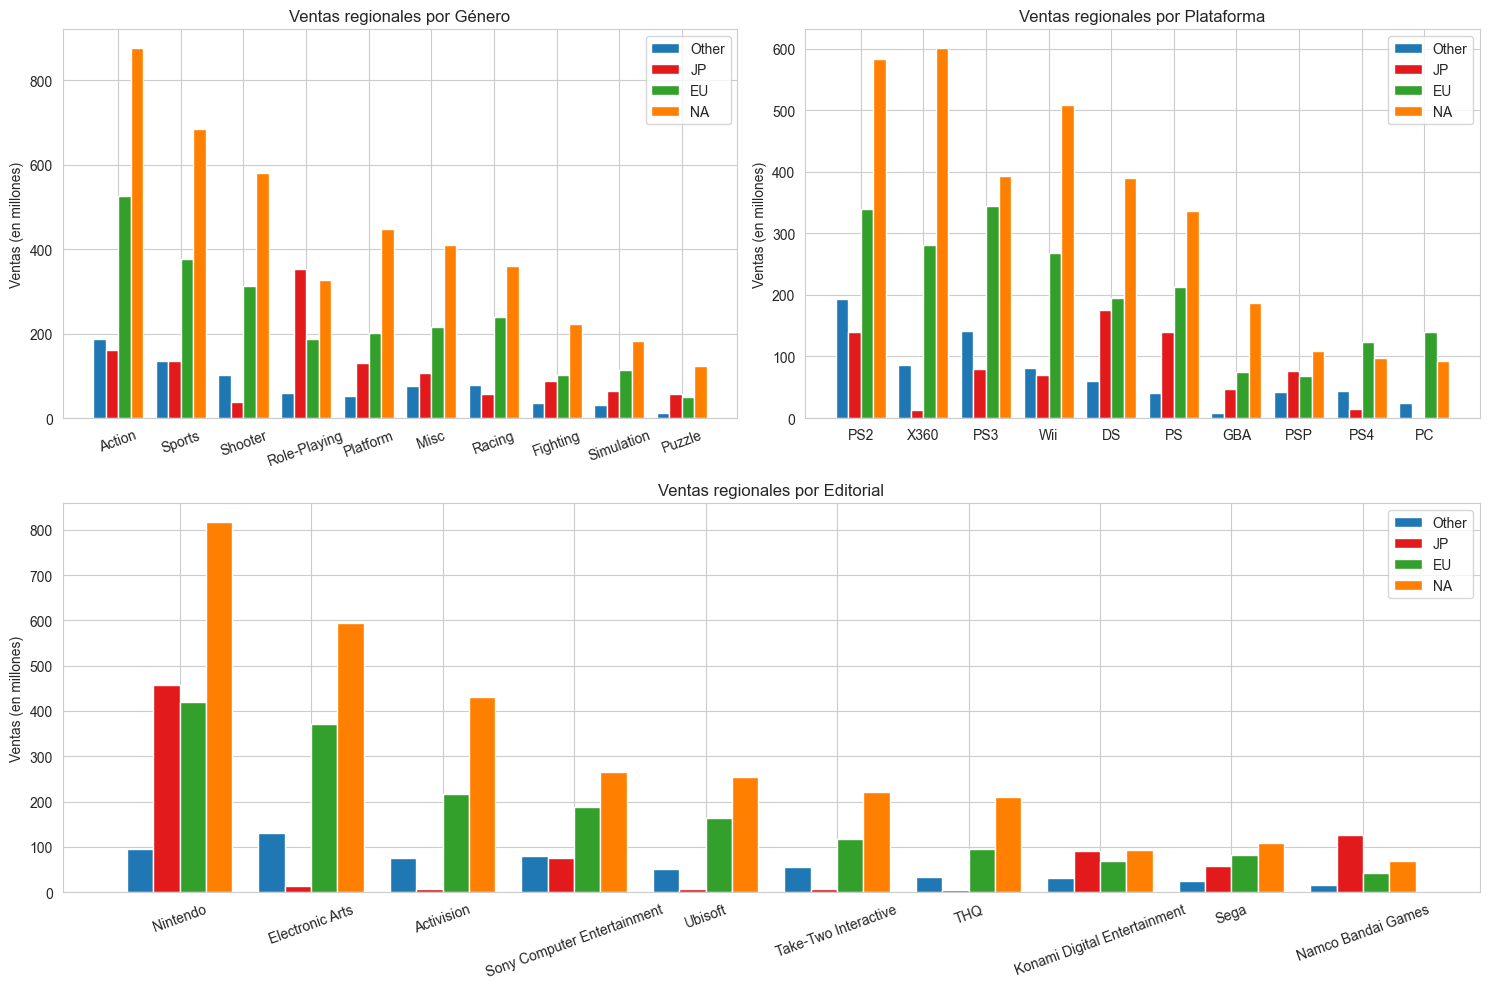

In [60]:
f = plt.figure(figsize=(15,10))

ax1 = f.add_subplot(212)

labels = vg_sales_publisher['Publisher'][:10]


Other = vg_sales_publisher['Other_Sales'][:10]
JP = vg_sales_publisher['JP_Sales'][:10]
EU = vg_sales_publisher['EU_Sales'][:10]
NA = vg_sales_publisher['NA_Sales'][:10]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax1.bar(x - 1.5*width, Other, width, label='Other',color = custom_palette[1])
rects2 = ax1.bar(x - width/2, JP, width, label='JP',color=custom_palette[5])
rects3 = ax1.bar(x + width/2, EU, width, label='EU',color=custom_palette[3])
rects4 = ax1.bar(x + 1.5*width, NA, width, label='NA',color=custom_palette[7])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Ventas (en millones)')
ax1.set_title('Ventas regionales por Editorial')
ax1.set_xticks(x)
ax1.set_xticklabels(labels,rotation = 20)
ax1.legend()


ax2 = f.add_subplot(221)

labels2 = vg_sales_genre.Genre[:10]

NA = vg_sales_genre['NA_Sales'][:10]
EU = vg_sales_genre['EU_Sales'][:10]
Other = vg_sales_genre['Other_Sales'][:10]
JP = vg_sales_genre['JP_Sales'][:10]

x2 = np.arange(len(labels2))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax2.bar(x - 1.5*width, Other, width, label='Other',color = custom_palette[1])
rects2 = ax2.bar(x - width/2, JP, width, label='JP',color = custom_palette[5])
rects3 = ax2.bar(x + width/2, EU, width, label='EU',color = custom_palette[3])
rects4 = ax2.bar(x + 1.5*width, NA, width, label='NA',color = custom_palette[7])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Ventas (en millones)')
ax2.set_title('Ventas regionales por Género')
ax2.set_xticks(x2)
ax2.set_xticklabels(labels2, rotation=20)
ax2.legend()


ax3 = f.add_subplot(222)

labels3 = vg_sales_platform.Platform[:10]

NA = vg_sales_platform['NA_Sales'][:10]
EU = vg_sales_platform['EU_Sales'][:10]
Other = vg_sales_platform['Other_Sales'][:10]
JP = vg_sales_platform['JP_Sales'][:10]

x3 = np.arange(len(labels3))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax3.bar(x - 1.5*width, Other, width, label='Other',color = custom_palette[1])
rects2 = ax3.bar(x - width/2, JP, width, label='JP',color = custom_palette[5])
rects3 = ax3.bar(x + width/2, EU, width, label='EU',color = custom_palette[3])
rects4 = ax3.bar(x + 1.5*width, NA, width, label='NA',color = custom_palette[7])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_ylabel('Ventas (en millones)')
ax3.set_title('Ventas regionales por Plataforma')
ax3.set_xticks(x3)
ax3.set_xticklabels(labels3)
ax3.legend()

plt.tight_layout()
plt.show()

Visualización de valor relativo de ventas por región

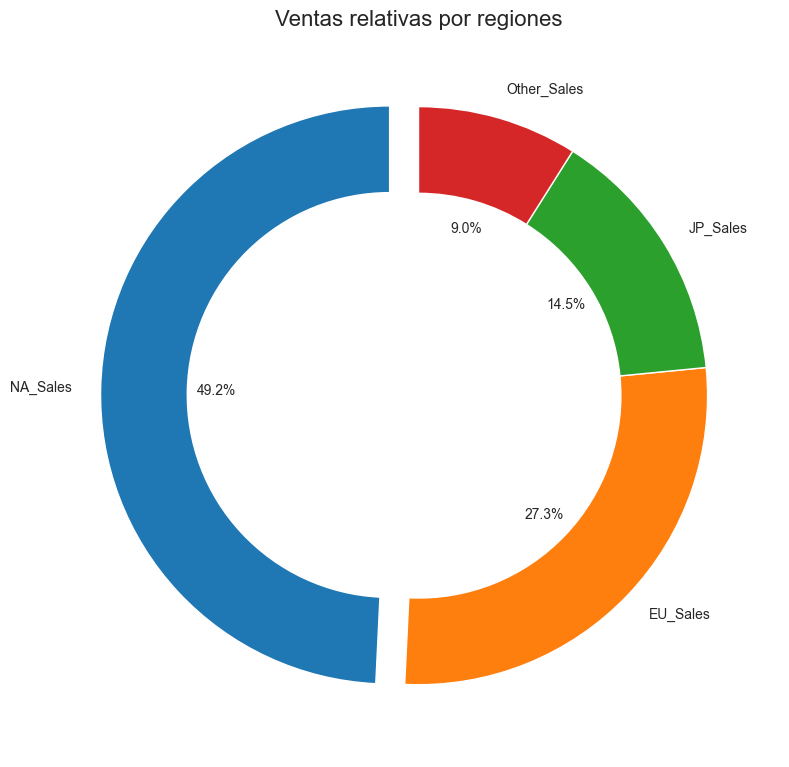

In [61]:
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_sums = df[sales_columns].sum()

labels = sales_columns
sizes = sales_sums
colors = sns.color_palette('tab10')[0:4]

plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=explode, colors=colors, wedgeprops={'width': 0.3})
plt.title('Ventas relativas por regiones', fontsize=16)

plt.tight_layout()
plt.show()

Este gráfico de arriba nos muestra la grande importancia del mercado norteamericano en relación a las ventas globales, debido a su alto valor, prácticamente representa mitad de los datos.